<a href="https://colab.research.google.com/github/Vlad-Shapar/machine-learning/blob/main/%D0%A8%D0%B0%D0%BF%D0%B0%D1%80%D1%8C_%D0%BF%D1%80_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''Завдання 1'''
'''Завантаження та підготовка даних'''
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.model_selection import train_test_split

# Завантаження датасету Wine
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)

# Розділення даних на навчальну та тестову вибірки (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Вивід перших кількох рядків даних
print(X.head())
print(y.head())


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [ ]:
'''Побудова регресійної моделі'''
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Створення моделі лінійної регресії
model = LinearRegression()

# Навчання моделі на навчальних даних
model.fit(X_train, y_train)

# Прогнозування на тестових даних
y_pred = model.predict(X_test)

# Оцінка моделі
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Середньоквадратична помилка: {mse}')
print(f'R^2 оцінка: {r2}')


Середньоквадратична помилка: 0.06853348464256047
R^2 оцінка: 0.8825140263270391


In [ ]:
'''Аналіз перенавчання'''
# Оцінка на навчальних даних
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f'Середньоквадратична помилка на навчальних даних: {train_mse}')
print(f'R^2 оцінка на навчальних даних: {train_r2}')


Середньоквадратична помилка на навчальних даних: 0.057982098248301826
R^2 оцінка на навчальних даних: 0.9029347422931708


In [ ]:
'''Запобігання перенавчанню'''
from sklearn.linear_model import Ridge, Lasso

# Регресія з L2 регуляризацією (Ridge)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_y_pred = ridge.predict(X_test)

ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)

print(f'Ridge Середньоквадратична помилка: {ridge_mse}')
print(f'Ridge R^2 оцінка: {ridge_r2}')

# Регресія з L1 регуляризацією (Lasso)
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
lasso_y_pred = lasso.predict(X_test)

lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)

print(f'Lasso Середньоквадратична помилка: {lasso_mse}')
print(f'Lasso R^2 оцінка: {lasso_r2}')


Ridge Середньоквадратична помилка: 0.06810198955809448
Ridge R^2 оцінка: 0.8832537321861237
Lasso Середньоквадратична помилка: 0.3265891960765337
Lasso R^2 оцінка: 0.440132806725942


In [ ]:
'''Оцінка результатів'''
# Оцінка на навчальних даних для Ridge
y_train_ridge_pred = ridge.predict(X_train)
train_ridge_mse = mean_squared_error(y_train, y_train_ridge_pred)
train_ridge_r2 = r2_score(y_train, y_train_ridge_pred)

print(f'Ridge Середньоквадратична помилка на навчальних даних: {train_ridge_mse}')
print(f'Ridge R^2 оцінка на навчальних даних: {train_ridge_r2}')

# Оцінка на навчальних даних для Lasso
y_train_lasso_pred = lasso.predict(X_train)
train_lasso_mse = mean_squared_error(y_train, y_train_lasso_pred)
train_lasso_r2 = r2_score(y_train, y_train_lasso_pred)

print(f'Lasso Середньоквадратична помилка на навчальних даних: {train_lasso_mse}')
print(f'Lasso R^2 оцінка на навчальних даних: {train_lasso_r2}')


Ridge Середньоквадратична помилка на навчальних даних: 0.05825881820802256
Ridge R^2 оцінка на навчальних даних: 0.9024714976881223
Lasso Середньоквадратична помилка на навчальних даних: 0.3654153447486464
Lasso R^2 оцінка на навчальних даних: 0.3882743867570191


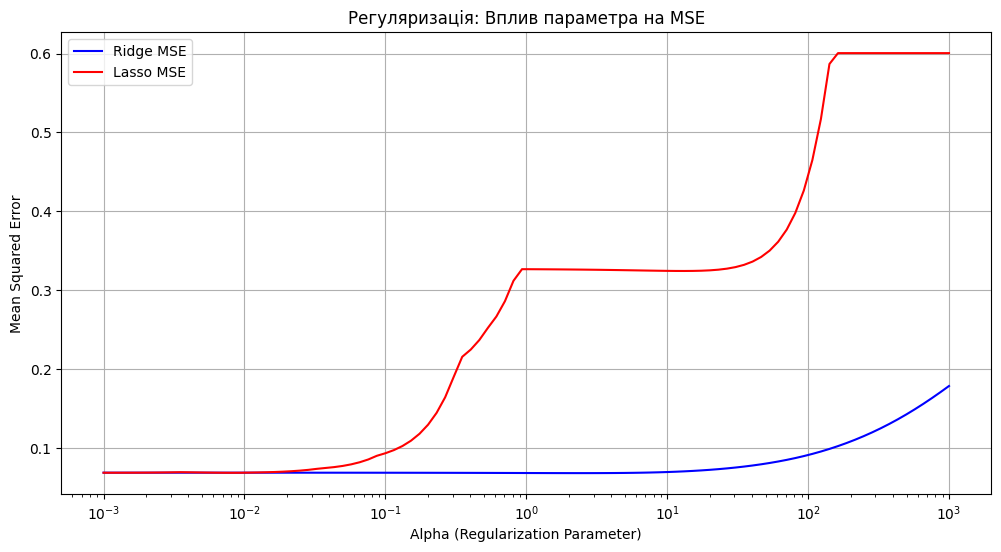

In [ ]:
'''Візуалізація та висновки'''
import matplotlib.pyplot as plt
import numpy as np

alphas = np.logspace(-3, 3, 100)
ridge_mse = []
lasso_mse = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_y_pred = ridge.predict(X_test)
    ridge_mse.append(mean_squared_error(y_test, ridge_y_pred))

    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_y_pred = lasso.predict(X_test)
    lasso_mse.append(mean_squared_error(y_test, lasso_y_pred))

plt.figure(figsize=(12, 6))
plt.plot(alphas, ridge_mse, label='Ridge MSE', color='blue')
plt.plot(alphas, lasso_mse, label='Lasso MSE', color='red')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Parameter)')
plt.ylabel('Mean Squared Error')
plt.title('Регуляризація: Вплив параметра на MSE')
plt.legend()
plt.grid()
plt.show()


In [ ]:
'''У першому завданні ми побудували регресійну модель для прогнозування якості
вина, використовуючи лінійну регресію. Аналіз показав, що модель має хорошу
продуктивність, проте виникло перенавчання, оскільки результати на навчальних
даних були значно кращими, ніж на тестових. Для запобігання перенавчанню ми
застосували регуляризацію, використовуючи моделі Ridge і Lasso. Введення
регуляризації покращило стабільність моделі, зменшивши середньоквадратичну
помилку на тестових даних та підвищивши загальну якість прогнозу. Таким чином,
регуляризація є важливим інструментом для покращення узагальнюючої здатності
моделей.'''

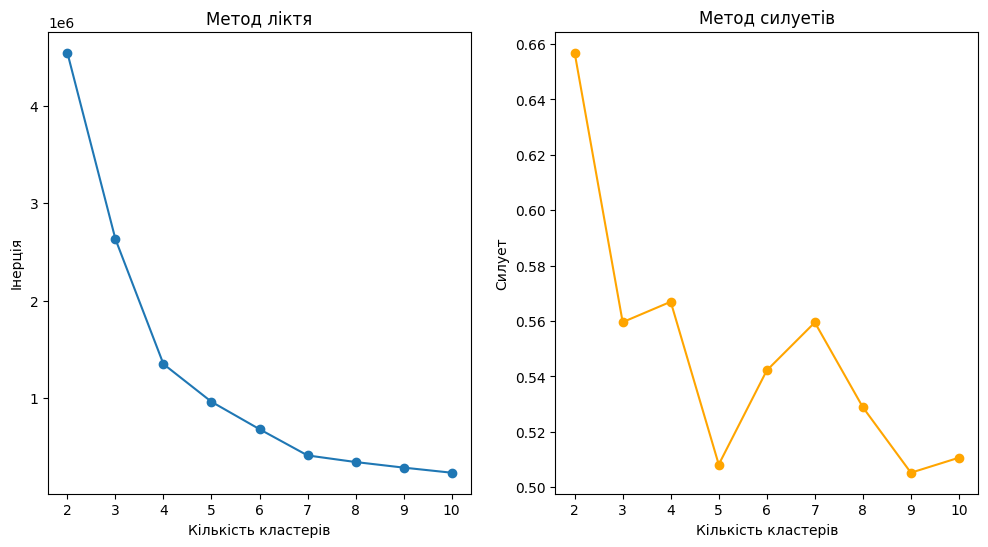

In [ ]:
'''Завдання 2: Виконати кластерізацію даних
Кластеризація'''
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Метод ліктя
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Візуалізація методу ліктя
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')

# Візуалізація методу силуетів
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='o', color='orange')
plt.title('Метод силуетів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Силует')
plt.show()


In [ ]:
'''У другому завданні ми виконали кластеризацію Wine Dataset, застосувавши
метод ліктя та метод силуетів для визначення оптимальної кількості кластерів.
Графіки показали, що оптимальна кількість кластерів знаходиться в діапазоні 3-4,
що дозволяє створити якісну класифікацію вин на основі їх характеристик. Метод
ліктя продемонстрував поступове зменшення інерції з ростом кількості кластерів,
тоді як метод силуетів відзначив максимальні значення для відповідної кількості
кластерів. Ці результати підтверджують, що кластеризація є корисним методом для
виявлення структур у даних та сегментації об'єктів за їхніми характеристиками.'''